<div align='center'><font size="4" color="grey"><b>Credit Card Fraud</b></font><br>
Every year, millions of people fall victim to fraud that costs the global economy billions of dollars. If you're a victim, it can wreak havoc on your personal finances. Luckily, due to some modern fraud detection techniques many financial institutions have measures in place to help protect you from credit fraud.<br><br>

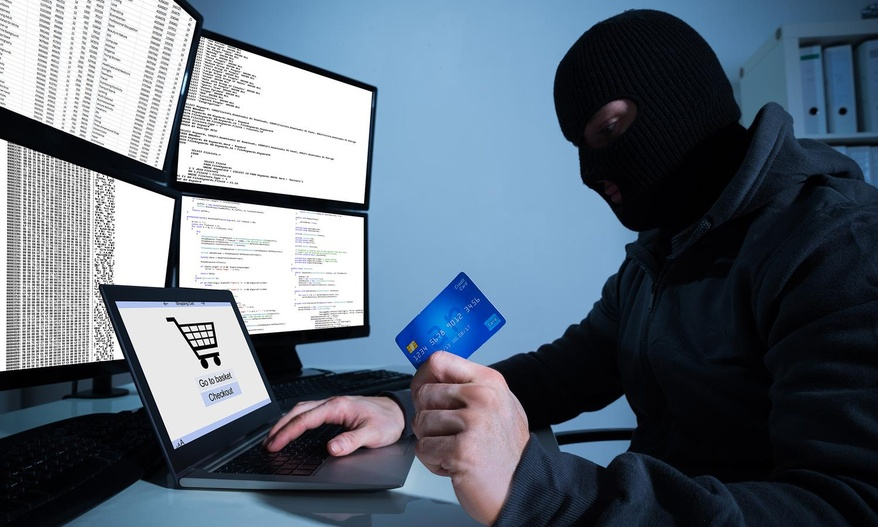

<hr>

# Fraud Detection

Fraud Detection is a technique used to identify unusual patterns that are different from the rest of the population and not behaving as expected. These unusual patterns are also called as outliers. 

The fraud detection involves in-depth data analysis/data-mining to recognize the unusual patterns.
In this dataset, most of the data analysis part is already done and most of the features are scaled. The names of the features are not shown due to privacy reasons.

Hence our main focus will be to balance the data and perform predective analysis.

# Problem Statement

The Credit Card Fraud Detection dataset contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


# Goals

Goal here is to identify as much fraudulent credit card transactions as possible. And as mentioned in the dataset insperation, I will calculate the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


# Table of Contents

1. [Import Libraries](#import-libraries)
2. [Read Data](#read-data)
3. [Understand the data](#understand-data)
    * [Check missing values](#check-missing-values)
4. [Exploratory Data Analysis](#eda)
    * [Observations from Data](#data-observations)
5. [Label Data](#label-data)
6. [Cluster data using Dimensionality reduction](#cluster-data)
7. [Split into train and test sets](#split-data)
8. [Scaling](#scaling)
9. [Predictive Analysis on unbalanced data](#unbalanced-predictive-analysis)
    * [Logistic regression](#unbalanced-lr)
    * [Decision Tree](#unbalanced-dt)
    * [Random Forest](#unbalanced-rf)
    * [Adaboost](#unbalanced-adaboost)
    * [XGBoost](#unbalanced-xgboost)
10. [Validate Unbalanced Data](#validate-unbalanced)
    * [ROC Curve](#unbalanced-roc)
    * [Precision-Recall Curve](#unbalanced-pr)
11. [Balance Data using oversampling method](#balance-data)
    * [Understand Balanced Data](#understand-balanced-data)
12. [Predictive Analysis on Balanced Data](#balanced-predictive-analysis)
    * [Logistic Regression](#balanced-lr)
    * [Decision Tree](#balanced-dt)
    * [Random Forest](#balanced-rf)
    * [Adaboost](#balanced-adaboost)
    * [XGBoost](#balanced-xgboost)
    * [Neural Networks](#balanced-nn)
13. [Validate Balanced Data](#validate-balanced)
    * [ROC Curve](#balanced-roc)
    * [Precision-Recall Curve](#balanced-pr)
14. [Feature Importance](#feature-importance)
15. [Conclusion](#conclusion)


# Import Libraries
<a id = "import-libraries"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.manifold import TSNE

# Read Data
<a id = "read-data"></a>
DataSet : The dataset that is used for Credit Card Fraud Detection is derived from the Kaggle URL :

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
dataset = pd.read_csv("../input/creditcardfraud/creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Understand the data
<a id = "understand-data"></a>

In [3]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
dataset.shape

(284807, 31)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Check missing values**
<a id = "check-missing-values"></a>

In [7]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Exploratory Data Analysis
<a id = "eda"></a>

Text(0.5, 1.0, 'Fraud vs Non-fraud cases Count')

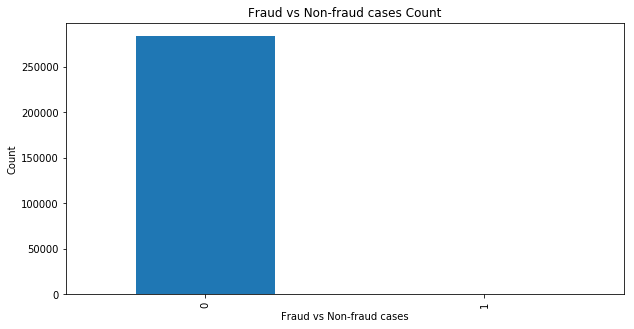

In [8]:
# Plot Fraud vs Non-fraud cases
plt.figure(figsize=(10,5))
ax = dataset.Class.value_counts().plot(kind = 'bar')
plt.xlabel("Fraud vs Non-fraud cases")
plt.ylabel("Count")
plt.title("Fraud vs Non-fraud cases Count")

The count plot above shows how unbalanced the data set is where most of the transactions are non-fraud. If we train model with these transactions, then algorithm will also assume that most of the transactions are non-fraud. But we don't want this, instead we want algorithm to find patterns for both fraud and non-fraud cases. Hence we have to balance fraud and non-fraud cases equally. We will do this step further in the notebook.

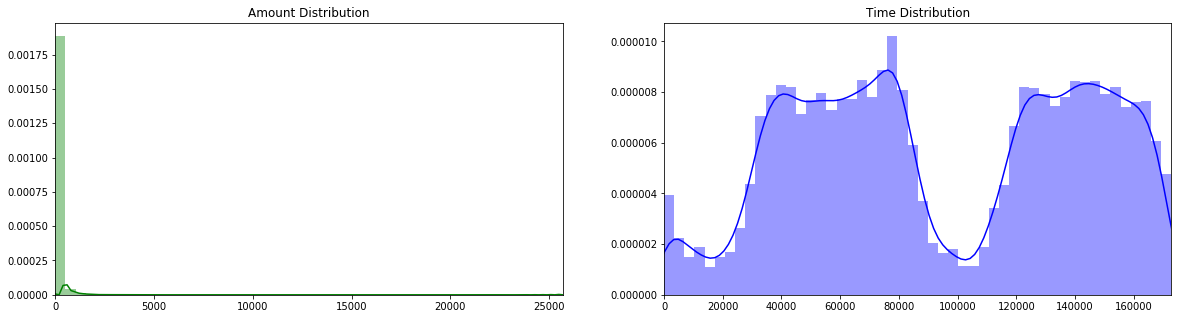

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

sns.distplot(dataset['Amount'].values, ax=ax[0], color='g')
ax[0].set_title('Amount Distribution')
ax[0].set_xlim([min(dataset['Amount'].values), max(dataset['Amount'].values)])

sns.distplot(dataset['Time'].values, ax=ax[1], color='b')
ax[1].set_title('Time Distribution')
ax[1].set_xlim([min(dataset['Time'].values), max(dataset['Time'].values)])

plt.show()

Distributed plot above for Amount and Time shows how skewed these features are. So we have to sclae them as well. We will do scaling further in the notebook.

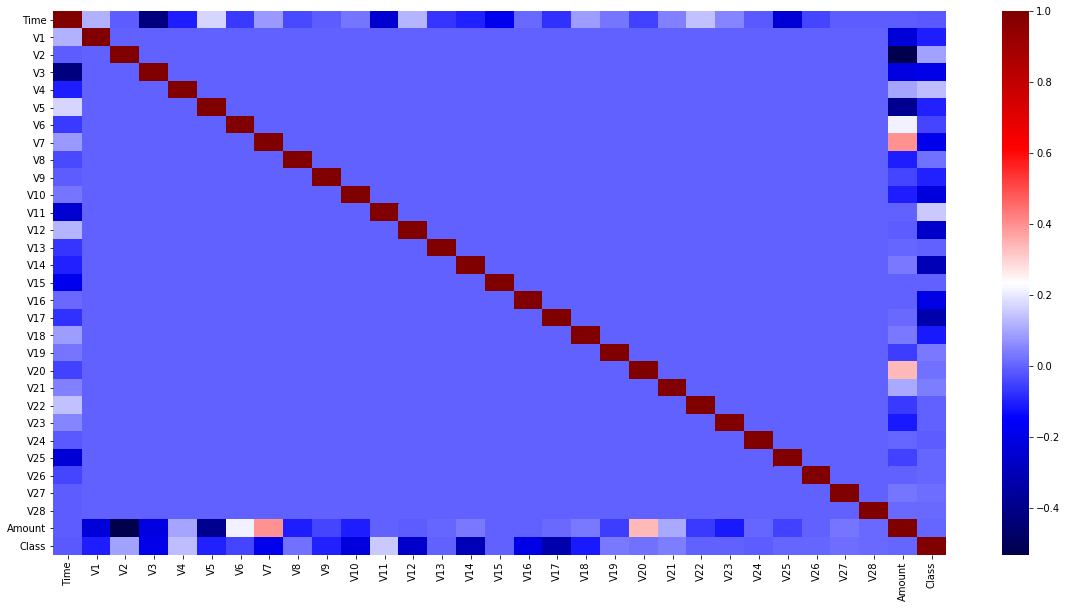

In [10]:
# Heatmap to find any high correlations
plt.figure(figsize=(20,10))
sns.heatmap(data=dataset.corr(), cmap="seismic")
plt.show()

**Observations from Data-**
<a id = "data-observations"></a>

The data set is very imbalanced with only 492 Fraud records and 284315 Non-fraud records.
The dataset consists of numerical values from V1 to V28, which looks transformed from real data.
But 'Time' and 'Amount' features are not transformed. So we need scaling of dataset.
There is no missing value/NaNs in the dataset.
Using this data as it is with balancing it might overfit, but for comparison,we will first start with imbalanced data and see the results. Then we will balance the data and check the results again.

# Label Data
<a id = "label-data"></a>

In [11]:
X = dataset.drop(["Class"], axis = 1)
y = dataset["Class"]

# Cluster data using Dimensionality reduction
<a id = "cluster-data"></a>

We will use **t-SNE** algorithm, which will accurately cluster the fraud vs non-fraud cases in the dataset.

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X.values)

In [ ]:
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')
plt.figure(figsize=(20,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.title('t-SNE')
plt.legend(handles=[blue_patch, red_patch])

# Split into train and test sets
<a id = "split-data"></a>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_trainA = X_train.drop(["Time"], axis = 1)
X_testA = X_test.drop(["Time"], axis = 1)

# Scaling
<a id = "scaling"></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_trainA)
X_test = sc.transform(X_testA)

In [ ]:
print(y_train[y_train.values == 0].shape[0])
print(y_train[y_train.values == 1].shape[0])
print(y_test[y_test.values == 0].shape[0])
print(y_test[y_test.values == 1].shape[0])


It is very imbalanced data set, but first check how it is performing.

# Predictive Analysis on unbalanced data
<a id ="unbalanced-predictive-analysis"></a>

In [ ]:
def fit_and_predict(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    ypred = classifier.predict(X_test)
    
    print("Accuracy Score:", accuracy_score(y_test, ypred))
    print("Recall Score:", recall_score(y_test, ypred))
    print("Precision Score:", precision_score(y_test, ypred))
    
    print("\n*********Confusion Matrix*********")
    cm = confusion_matrix(y_test, ypred)
    print(cm)
    fig= plt.figure(figsize=(10,5))
    sns.heatmap(cm,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n*********Classification Report*********")
    print(classification_report(y_test, ypred))
    
    test_df = pd.DataFrame(X_test, columns = X.columns[1:])
    test_df['Actual'] = y_test.values
    test_df['Predicted'] = ypred
    test_df.head()
    tp = test_df[(test_df['Actual'] == 1) & (test_df['Predicted'] == 1)].shape[0]
    actual_positive = test_df[(test_df['Actual'] == 1)].shape[0]
    print("True Positives: ", tp)
    print("Accuracy for fraud cases: ", (tp / actual_positive))
    print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
    return (y_test, ypred)
#     return roc_curve(y_test, ypred)

**Logistic regression**
<a id = "unbalanced-lr"></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
y_test, ypred = fit_and_predict(lr, X_train, X_test, y_train, y_test)
lr_fp, lr_tp, lr_threshold = roc_curve(y_test, ypred)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, ypred)

**Decision Tree**
<a id = "unbalanced-dt"></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
y_test, ypred = fit_and_predict(dtree, X_train, X_test, y_train, y_test)
dtree_fp, dtree_tp, dtree_threshold = roc_curve(y_test, ypred)
dtree_precision, dtree_recall, _ = precision_recall_curve(y_test, ypred)
# print("Threshold:", dtree_threshold)

**Random Forest**
<a id = "unbalanced-rf"></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
y_test, ypred = fit_and_predict(rf, X_train, X_test, y_train, y_test)
rf_fp, rf_tp, rf_threshold = roc_curve(y_test, ypred)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, ypred)
# print("Threshold:", rf_threshold)

**Adaboost**
<a id = "unbalanced-adaboost"></a>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators = 100, random_state = 0)
y_test, ypred = fit_and_predict(adb, X_train, X_test, y_train, y_test)
adb_fp, adb_tp, adb_threshold = roc_curve(y_test, ypred)
adb_precision, adb_recall, _ = precision_recall_curve(y_test, ypred)

**XGBoost**
<a id = "unbalanced-xgboost"></a>

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 0)
y_test, ypred = fit_and_predict(xgb, X_train, X_test, y_train, y_test)
xgb_fp, xgb_tp, xgb_threshold = roc_curve(y_test, ypred)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, ypred)

# Validate Unbalanced Data
<a id = "validate-unbalanced"></a>

**ROC Curve**
<a id = "unbalanced-roc"></a>

In [ ]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(lr_fp, lr_tp, color="red", label ="Logistic Regression")
plt.plot(dtree_fp, dtree_tp, color="green", label = "Decision Tree")
plt.plot(rf_fp, rf_tp, color="blue", label = "Random Forest")
plt.plot(adb_fp, adb_tp, color="orange", label = "AdaBoost")
plt.plot(xgb_fp, xgb_tp, color="cyan", label = "XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

**Precision-Recall Curve**
<a id = "unbalanced-pr"></a>

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.step(lr_recall, lr_precision, marker='.', color='red', label ="Logistic Regression")
plt.step(dtree_recall, dtree_precision, marker='.', color='green', label = "Decision Tree")
plt.step(rf_recall, rf_precision, marker='.', color='blue', label = "Random Forest")
plt.step(adb_recall, adb_precision, marker='.', color='orange', label = "AdaBoost")
plt.step(xgb_recall, xgb_precision, marker='.', color='cyan', label = "XGBoost")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()

With imbalanced dataset we are still getting satisfactory results.
And it shows that the Decison Tree and Random Forest both are giving almost same results.
But lets see how it reacts when we balance the dataset.

# Balance Data using oversampling method
<a id = "balance-data"></a>

In [ ]:
print(X_trainA.shape, y_train.shape)
print(X_testA.shape, y_test.shape)

In [ ]:
X_train1 = X_trainA
X_train1['Class'] = y_train
X_train1.head()

In [ ]:
X_train_0_class, X_train_1_class = X_train1.Class.value_counts()
print(X_train_0_class, X_train_1_class)

In [ ]:
X_train1_0_df = X_train1[X_train1['Class']==0]
X_train1_1_df = X_train1[X_train1['Class']==1]
print(X_train1_0_df.shape, X_train1_1_df.shape)

**Understand Balanced Data**
<a id ="understand-balanced-data"></a>

In [ ]:
X_train1_1_df = X_train1_1_df.sample(X_train_0_class, replace=True, random_state=0)
print(X_train1_0_df.shape, X_train1_1_df.shape)

In [ ]:
X_train1 = pd.concat([X_train1_0_df, X_train1_1_df])
X_train1.shape

In [ ]:
print(X_train1[X_train1['Class']==0].shape)
print(X_train1[X_train1['Class']==1].shape)

In [ ]:
X_trainB = X_train1.drop("Class", axis =1)
y_trainB = X_train1["Class"]

In [ ]:
print(X_trainB.shape, y_trainB.shape)
print(X_testA.shape, y_test.shape)

In [ ]:
X_trainB = sc.fit_transform(X_trainB)
X_testA = sc.transform(X_testA)

# Predictive Analysis on Balanced Data
<a id = "balanced-predictive-analysis"></a>

**Logistic Regression**
<a id = "balanced-lr"></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
y_test, ypred = fit_and_predict(lr, X_trainB, X_testA, y_trainB, y_test)
lr_fp, lr_tp, lr_threshold = roc_curve(y_test, ypred)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, ypred)

**Decision Tree**
<a id = "balanced-dt"></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
y_test, ypred = fit_and_predict(dtree, X_trainB, X_testA, y_trainB, y_test)
dtree_fp, dtree_tp, dtree_threshold = roc_curve(y_test, ypred)
dtree_precision, dtree_recall, _ = precision_recall_curve(y_test, ypred)

**Random Forest**
<a id = "balanced-rf"></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
y_test, ypred = fit_and_predict(rf, X_trainB, X_testA, y_trainB, y_test)
rf_fp, rf_tp, rf_threshold = roc_curve(y_test, ypred)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, ypred)

**Adaboost**
<a id = "balanced-adaboost"></a>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators = 100, random_state = 0)
y_test, ypred = fit_and_predict(adb, X_trainB, X_testA, y_trainB, y_test)
adb_fp, adb_tp, adb_threshold = roc_curve(y_test, ypred)
adb_precision, adb_recall, _ = precision_recall_curve(y_test, ypred)

**XGBoost**
<a id = "balanced-xgboost"></a>

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 0)
y_test, ypred = fit_and_predict(xgb, X_trainB, X_testA, y_trainB, y_test)
xgb_fp, xgb_tp, xgb_threshold = roc_curve(y_test, ypred)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, ypred)

**Neural Networks**
<a id = "balanced-nn"></a>

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
classifier = Sequential()
classifier.add(Dense(units=16, activation="relu", input_dim=29))
classifier.add(Dense(units=2, activation="softmax"))
classifier.summary()

In [ ]:
classifier.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
classifier.fit(X_trainB, y_trainB, batch_size=10, epochs=20)

In [ ]:
ypred_nn = classifier.predict_classes(X_testA)
print(confusion_matrix(y_test, ypred_nn))
print(classification_report(y_test, ypred_nn))
print("Accuracy Score:", accuracy_score(y_test, ypred_nn))

test_df = pd.DataFrame(X_test, columns = X.columns[1:])
test_df['Actual'] = y_test.values
test_df['Predicted'] = ypred_nn
test_df.head()
tp = test_df[(test_df['Actual'] == 1) & (test_df['Predicted'] == 1)].shape[0]
actual_positive = test_df[(test_df['Actual'] == 1)].shape[0]
print("True Positives: ", tp)
print("Accuracy for fraud cases: ", (tp / actual_positive))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred_nn))
nn_fp, nn_tp, nn_threshold = roc_curve(y_test, ypred_nn)
nn_precision, nn_recall, _ = precision_recall_curve(y_test, ypred_nn)

In [ ]:
classifier.evaluate(X_testA, y_test)

# Validate Balanced Data
<a id = "validate-balanced"></a>

**ROC Curve**
<a id = "balanced-roc"></a>

In [ ]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(lr_fp, lr_tp, color="red", label ="Logistic Regression")
plt.plot(dtree_fp, dtree_tp, color="green", label = "Decision Tree")
plt.plot(rf_fp, rf_tp, color="blue", label = "Random Forest")
plt.plot(adb_fp, adb_tp, color="orange", label = "AdaBoost")
plt.plot(xgb_fp, xgb_tp, color="cyan", label = "XGBoost")
plt.plot(nn_fp, nn_tp, color="purple", label = "Neural Networks")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

**Precision-Recall Curve**
<a id = "balanced-pr"></a>

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.step(lr_recall, lr_precision, marker='.', color='red', label ="Logistic Regression")
plt.step(dtree_recall, dtree_precision, marker='.', color='green', label = "Decision Tree")
plt.step(rf_recall, rf_precision, marker='.', color='blue', label = "Random Forest")
plt.step(adb_recall, adb_precision, marker='.', color='orange', label = "AdaBoost")
plt.step(xgb_recall, xgb_precision, marker='.', color='cyan', label = "XGBoost")
plt.step(nn_recall, nn_precision, marker='.', color="purple", label = "Neural Networks")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()

# Feature Importance
<a id = "feature-importance"></a>

Get most important features and their contribution in model

In [ ]:
X_trainA.columns[:-1]

In [ ]:
feature_importance_df = pd.DataFrame(X_trainA.columns[:-1], columns=["Feature"])
feature_importance_df["Importance"] = rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

In [ ]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")

# Conclusion
<a id = "conclusion"></a>

After investigating and visualizing through the data, we found that the data is unbalanced. So we balanced the data. <br>
After balancing training data, we trainied it and these were the results-<br>

<b>Logistic Regression</b> is giving 98% accuracy, 91% recall and 6% precision. Accuracy for fraud cases is 91% and ROC AUC Score is 94%<br>
<b>Decision Tree</b> is giving 99% accuracy, 69% recall and 76% precision. Accuracy for fraud cases is 69% and ROC AUC Score is 85%<br>
<b>Random Forest</b> is giving 99% accuracy, 78% recall and 95% precision. Accuracy for fraud cases is 78% and ROC AUC Score is 89%<br>
<b>AdaBoost</b> is giving 99% accuracy, 86 % recall and 18% precision. Accuracy for fraud cases is 86% and ROC AUC Score is 93%<br>
<b>XGBoost</b> is giving 99% accuracy, 83 % recall and 92% precision. Accuracy for fraud cases is 83% and ROC AUC Score is 91%<br>
<b>Neural Networks</b> is giving 99% accuracy, 82 % recall and 44% precision. Accuracy for fraud cases is 82% and ROC AUC Score is 91%

With Neural Networks on balanced dataset, its giving 86% accuracy on Fraud Cases.
But still for Fraud cases the winner is Logistic Regression with 91% accuracy on Fraud Cases. But logistic regression is giving more False Positives and the precision is less. Boosting model - Adaboost is next consideration with accuracy of 93%.
If we want to give precision the preference, then XGBoost can be considered, and accuracy can be improved twiking some parameters.<br><br>
**Hence it depemds on the accuracy parameter we want to consider, but for the unbalanced data most of the time consideration is given to ROC AUC score so Logistic Regression is winner here, as its giving most True Positives. Specially, in cases like fraud transactions False Positives can be fine, but we can't compromise with the True Positives and leave the fraudent transactions happen.**

**Don't forget to upvote if you like the kernel. Its free :)**